In [367]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Spotify

In [368]:
# Read the spotify dataset
spotify_df = pd.read_csv('dataset.csv')
spotify_df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [369]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Preprocessing

In [370]:
# Drop the first columns
spotify_df.drop(columns=spotify_df.columns[0], axis=1, inplace=True)

In [371]:
# Get Used Columns
spotify_df = spotify_df.drop(['track_id', 'artists', 'album_name', 'track_name'], axis=1)

In [372]:
spotify_df.head(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [373]:
# Check if dataset contain any null value
spotify_df.isnull().values.any()

False

In [374]:
# Inspect dataset structure
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

In [375]:
# Get 5 entries from each track_genre column
# spotify_df = spotify_df.groupby('track_genre').head(20)

In [376]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

In [377]:
# Check columns number of unique values
spotify_df.nunique()

popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

In [378]:
# Get all track_genre columns unique values
spotify_df['track_genre'].unique().tolist()

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

In [379]:
# Get only certain track genres 
filter_genre = ['acoustic', 'indie', 'spanish', 'sad', 'hip-hop']
spotify_df = spotify_df[spotify_df['track_genre'].isin(filter_genre)]

In [380]:
spotify_df['track_genre'].unique().tolist()

['acoustic', 'hip-hop', 'indie', 'sad', 'spanish']

In [381]:
spotify_df.reset_index(drop=True, inplace=True)

In [382]:
# Change the explicit columns to intergers
# It only has two unique values: TRUE, FALSE
explicit_dict = {'FALSE': 0, 'TRUE': 1}
spotify_df['explicit'] = spotify_df['explicit'].replace(explicit_dict).astype(int)

In [383]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5000 non-null   int64  
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   int64  
 3   danceability      5000 non-null   float64
 4   energy            5000 non-null   float64
 5   key               5000 non-null   int64  
 6   loudness          5000 non-null   float64
 7   mode              5000 non-null   int64  
 8   speechiness       5000 non-null   float64
 9   acousticness      5000 non-null   float64
 10  instrumentalness  5000 non-null   float64
 11  liveness          5000 non-null   float64
 12  valence           5000 non-null   float64
 13  tempo             5000 non-null   float64
 14  time_signature    5000 non-null   int64  
 15  track_genre       5000 non-null   object 
dtypes: float64(9), int64(6), object(1)
memory 

## Classfication

In [384]:
# Get the data and labels 
data = spotify_df.drop(columns='track_genre')
labels = spotify_df['track_genre']

In [385]:
print(labels.shape, data.shape)

(5000,) (5000, 15)


In [386]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(data, spotify_df['track_genre'], test_size=0.2, random_state=42)

In [387]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Classification With MLP

#### Configuration 1

In [388]:
# Initialize the MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

In [389]:
# Train the model
model_mlp.fit(x_train, y_train)

/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [390]:
# Make predictions on the test set
mlp_predict = model_mlp.predict(x_test)

print(classification_report(y_test, mlp_predict))

              precision    recall  f1-score   support

    acoustic       0.67      0.61      0.64       216
     hip-hop       0.66      0.79      0.72       190
       indie       0.55      0.50      0.52       192
         sad       0.81      0.80      0.81       210
     spanish       0.61      0.61      0.61       192

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



#### Configuration 2

In [391]:
# Configuration 2
model_mlp_2 = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01, max_iter=300, random_state=42)

In [392]:
# Train the model
model_mlp_2.fit(x_train, y_train)

/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 50), max_iter=300,
              random_state=42)

In [393]:
# Make predictions on the test set
mlp_predict_2 = model_mlp_2.predict(x_test)

print(classification_report(y_test, mlp_predict_2))

              precision    recall  f1-score   support

    acoustic       0.68      0.60      0.64       216
     hip-hop       0.70      0.72      0.71       190
       indie       0.55      0.58      0.56       192
         sad       0.77      0.78      0.77       210
     spanish       0.60      0.62      0.61       192

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



#### Configuration 3

In [394]:
# Configuration 3
model_mlp_3 = MLPClassifier(hidden_layer_sizes=(50, 50), alpha=0.1, max_iter=100, random_state=42)

In [395]:
# Train the model
model_mlp_3.fit(x_train, y_train)

/Users/jeffreyabraham/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=(50, 50), max_iter=100,
              random_state=42)

In [396]:
# Make predictions on the test set
mlp_predict_3 = model_mlp_3.predict(x_test)

print(classification_report(y_test, mlp_predict_3))

              precision    recall  f1-score   support

    acoustic       0.70      0.67      0.68       216
     hip-hop       0.70      0.78      0.74       190
       indie       0.56      0.53      0.54       192
         sad       0.81      0.80      0.81       210
     spanish       0.64      0.63      0.63       192

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.68      0.69      0.68      1000



## Confusion Matrix

#### Configuration 1

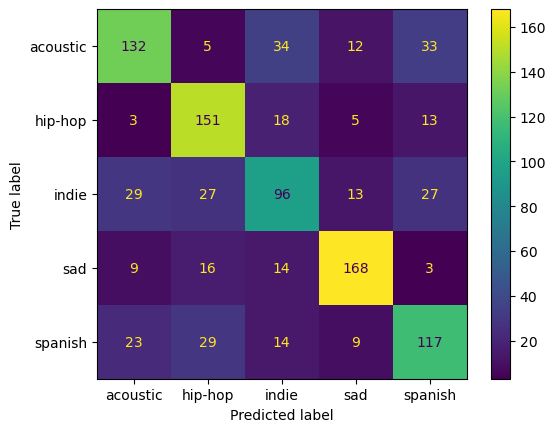

In [397]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, mlp_predict, labels=model_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_mlp.classes_)
disp.plot()
plt.show()

#### Configuration 2

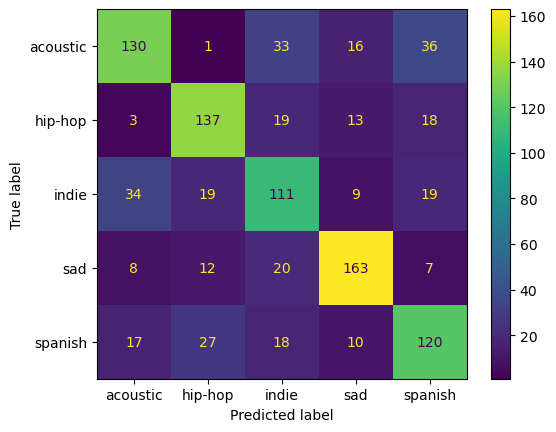

In [398]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, mlp_predict_2, labels=model_mlp_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_mlp_2.classes_)
disp.plot()
plt.show()

#### Configuration 3

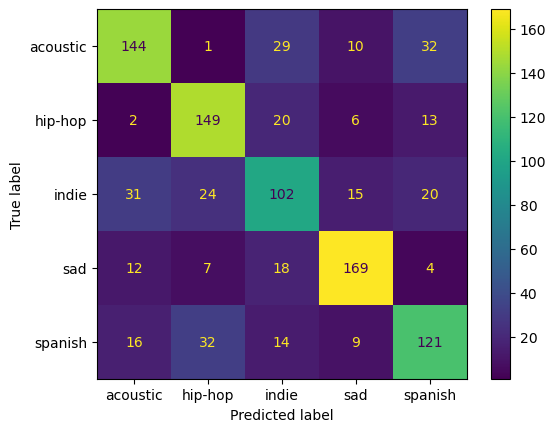

In [399]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, mlp_predict_3, labels=model_mlp_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_mlp_3.classes_)
disp.plot()
plt.show()